# Probability Density Functions in Python

Date: 2020-10-30

In [1]:
import numpy as np
from scipy.integrate import quad
import pandas as pd

## Scenario

Let $X$ be a continuous random variable with p.d.f.

$$
f(x) = \begin{cases}
    &4x^{3} \hspace{3mm} &x \in (0, 1] \\
    &0 \hspace{3mm} &\text{otherwise}
\end{cases}
$$

-----

## Questions

**(a)** Is $f(x)$ a valid p.d.f.?

**(b)** Plot the p.d.f.

**(c)** Calculate $P(X \geq 0.5)$

**(d)** Calculate $P(X < 0.42)$

**(e)** Calculate $P(0.15 \leq X \leq 0.65)$

**(f)** Calculate the mean and variance of the pdf

-----

We first define a function that returns the value of $f(a)$, where $a \in (0,1)$.

In [2]:
def pdf(a: float) -> float:
    '''Calculates value of f(a).
    Valid range of a: (0, 1)'''
    return 4 * (a ** 3)

### (a)

There are two properties for $f(x)$ to be a valid p.d.f.

1. $f(x) > 0$ for all $x$ in $X$
2. $\int f(x) = 1$ over the range of $X$

#### Property 1: $f(x) > 0$ 

Rather than using iteration, we will instead

1. Create a **DataFrame** with columns $x$ and $f(x)$
2. Filter the **DataFrame** for rows $f(x) \leq 0$
3. Check size of filtered **DataFrame** is 0

In [3]:
# declare an array
x = np.arange(start=0, stop=1, step=0.000001)

In [4]:
# create the df
df_pdf = pd.DataFrame(data=x, columns={'x'})
df_pdf['f'] = pdf(x)

In [5]:
# filter the df, check df.size is 0
filtered_df = df_pdf.query('f < 0')
filtered_df.size == 0

True

#### Property 2: $\int f(x) = 1$

In [6]:
# does the pdf integrate to 1 over the range?
# function quad returns a tuple, select first element
quad(pdf, a=0, b=1)[0] == 1

True

As both tests returned `True`, we can confirm that $f(x)$ is a valid p.d.f.

### (b)

[Text(0.5, 1.0, 'f(x) = 4x^3')]

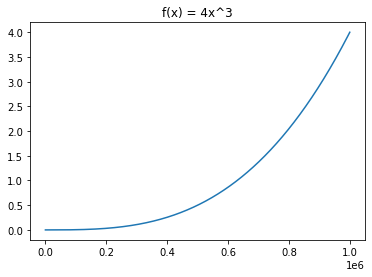

In [7]:
df_pdf['f'].plot(kind='line').set(title='f(x) = 4x^3')

### (c)

$$
P(X \leq 0.5) = P(X < 0.5) = \int_{0}^{0.5} 4 x^{3} \hspace{1mm} dx = ...
$$

In [8]:
quad(pdf, a=0, b=0.5)[0]

0.0625

### (d)

$$
P(X > 0.42) \int_{0.42}^{1} 4 x^{3} \hspace{1mm} dx = ...
$$

In [9]:
quad(pdf, a=0.42, b=1)[0]

0.96888304

As a sanity check, let us calculate $1 - F(0.42)$

In [10]:
1 - quad(pdf, a=0, b=0.42)[0]

0.96888304

### (e)

$$
P(0.15 < X < 0.65) = \int_{0.15}^{0.65} 4 x^{3} \hspace{1mm} dx = ...
$$

In [11]:
quad(pdf, a=0.15, b=0.65)[0]

0.178

### (f)

The mean and variance of a probability distribution function are

$$
\begin{aligned}
    &E(X) = \int_{L}^{U} x \> f(x) \> dx, \\
    &V(X) = E(X^{2}) - E(X)^{2} = \int_{L}^{U} x^{2} \> f(x) \> dx - E(X)^{2}
\end{aligned}
$$

We'll first define two function: `xfx` and `x2fx`

In [12]:
def xfx(a: float) -> float:
    '''Calculates value of a.f(a).
    Valid range of a: (0, 1)'''
    return a * 4 * (a ** 3)

In [13]:
def x2fx(a: float) -> float:
    '''Calculates value of a^2.f(a).
    Valid range of a: (0, 1)'''
    return (a ** 2) * 4 * (a ** 3)

Calculate $E(X)$

In [14]:
mean = quad(xfx, a=0, b=1)[0]
mean

0.8

Calculate $V(X)$

In [15]:
 quad(x2fx, a=0, b=1)[0] - (mean ** 2)

0.026666666666666616